In [1]:
import pandas as pd

X_train = pd.read_csv(filepath_or_buffer='X_train.txt', header=None, sep=' ')
Y_train = pd.read_csv(filepath_or_buffer='y_train.txt', header=None, sep=' ')

X_test = pd.read_csv(filepath_or_buffer='X_test.txt', header=None, sep=' ')
Y_test = pd.read_csv(filepath_or_buffer='y_test.txt', header=None, sep=' ')

subject_id_train = pd.read_csv(filepath_or_buffer='subject_id_train.txt', header=None, sep=' ')
subject_id_test = pd.read_csv(filepath_or_buffer='subject_id_test.txt', header=None, sep=' ')

In [2]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn
import time

def build_classifier(x_train, y_train):
    start = time.time()
    result = RandomForestClassifier()
    result.fit(x_train, y_train.values.ravel())
    end = time.time()
    return result, end - start

def build_prediction(classifier, x_test):
    start = time.time()
    result = classifier.predict(x_test)
    end = time.time()
    return result, end - start

def show_confusion_matrix(name, y_test, y_pred):
    print(name,' confusion matrix:')
    cm = confusion_matrix(y_test, y_pred)
    seaborn.set(font_scale=1.4)
    seaborn.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues')
    plt.show()



Random Forest Pred  confusion matrix:


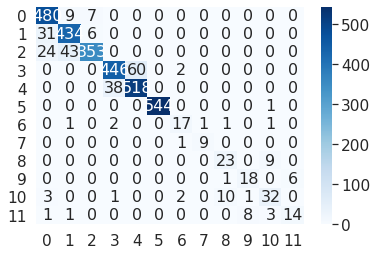

accuracy score for Random Forest prediction: 0.9133459835547122
cross value score for Random Forest Classifier: [0.89446589 0.87644788 0.90083709 0.91371539 0.9401159 ]
training time: 15.721765995025635 , testing time: 0.11025071144104004


In [3]:
#ACC - accurancy score
from sklearn.metrics import accuracy_score

def build_basic_analisys(x_train, x_test, y_train, y_test):
    classifier, classification_time = build_classifier(x_train, y_train)
    prediction, prediction_time = build_prediction(classifier, x_test)

    acc_score = accuracy_score(Y_test, prediction)
    show_confusion_matrix('Random Forest Pred', y_test, prediction)
    print("accuracy score for Random Forest prediction:", acc_score)

    cv_score = cross_val_score(classifier, x_train, y_train.values.ravel(), cv=5)
    print("cross value score for Random Forest Classifier:", cv_score)

    print('training time: {} , testing time: {}'.format(classification_time, prediction_time))
    
    result = {}
    result['name'] = 'basic'
    result['acc_score'] = acc_score
    result['cv_score'] = cv_score
    result['classification_time'] = classification_time
    result['prediction_time'] = prediction_time
    return result
    
basic_analysis = build_basic_analisys(X_train, X_test, Y_train, Y_test)

PCA Random Forest Pred  confusion matrix:


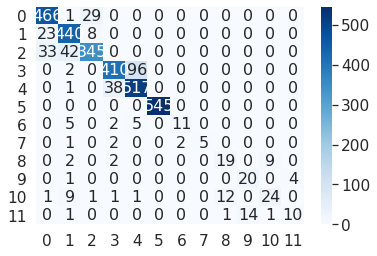

accuracy score for PCA Random Forest: 0.8893105629348513
cross value score for PCA Random Forest: [0.87387387 0.86293436 0.84739214 0.85447521 0.89761751]
training time: 8.121657371520996 , testing time: 0.0910801887512207


In [8]:
#PCA - Principal Component Analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def build_pca_analysis(x_train, x_test, y_train, y_test):
#     sc = StandardScaler()
#     x_train_pca = sc.fit_transform(x_train)
#     x_test_pca = sc.transform(x_test)
    
    pca = PCA(n_components=100)
    x_train_pca = pca.fit_transform(x_train)
    x_test_pca = pca.transform(x_test)
    pca_clf, pca_clf_time = build_classifier(x_train_pca, y_train)
    pca_pred, pca_pred_time = build_prediction(pca_clf, x_test_pca)
    
    
    show_confusion_matrix('PCA Random Forest Pred', y_test, pca_pred)
    acc_score = accuracy_score(y_test, pca_pred)
    print("accuracy score for PCA Random Forest:", acc_score)
    
    cv_score = cross_val_score(pca_clf, x_train_pca, y_train.values.ravel(), cv=5)
    print("cross value score for PCA Random Forest:", cv_score)

    print('training time: {} , testing time: {}'.format(pca_clf_time, pca_pred_time))

    result = {}
    result['name'] = 'pca'
    result['acc_score'] = acc_score
    result['cv_score'] = cv_score
    result['classification_time'] = pca_clf_time
    result['prediction_time'] = pca_pred_time
    return result
    
pca_analysis = build_pca_analysis(X_train, X_test, Y_train, Y_test)

In [9]:
def get_dim_reduction_results (results):
    data = {}
    for result in results:
        for entry in result.keys():
            if(entry != 'name'):
                column = result['name'] + '_'+ entry
                data[column] = result[entry]
    return data
            
dim_results = get_dim_reduction_results([basic_analysis, pca_analysis])         
dim_results_df = pd.DataFrame(dim_results)
print(dim_results_df)

   basic_acc_score  basic_cv_score  basic_classification_time  \
0         0.913346        0.894466                  15.721766   
1         0.913346        0.876448                  15.721766   
2         0.913346        0.900837                  15.721766   
3         0.913346        0.913715                  15.721766   
4         0.913346        0.940116                  15.721766   

   basic_prediction_time  pca_acc_score  pca_cv_score  \
0               0.110251       0.889311      0.873874   
1               0.110251       0.889311      0.862934   
2               0.110251       0.889311      0.847392   
3               0.110251       0.889311      0.854475   
4               0.110251       0.889311      0.897618   

   pca_classification_time  pca_prediction_time  
0                 8.121657              0.09108  
1                 8.121657              0.09108  
2                 8.121657              0.09108  
3                 8.121657              0.09108  
4               

In [10]:
dim_results_df.to_csv('dim_reduction.csv', index=False)

In [13]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def build_classifiers_ensemble(X_train, X_test, Y_train, Y_test):
    pca = PCA(n_components=100)
    x_train_pca = pca.fit_transform(X_train)
    x_test_pca = pca.transform(X_test)
    #pca_clf, pca_clf_time = build_classifier(x_train_pca, y_train)
    #pca_pred, pca_pred_time = build_prediction(pca_clf, x_test_pca)
    
    result = {}
    lsvm_clf = svm.SVC(C=5000, kernel='poly', degree=2)
    lsvm_clf.weight = 0.3
    lsvm_clf.fit(x_train_pca, Y_train.values.ravel())
    result['svm'] = lsvm_clf
    
    crf_clf = RandomForestClassifier()
    crf_clf.weight = 0.3
    crf_clf.fit(x_train_pca, Y_train.values.ravel())
    result['rf'] = crf_clf

    knn_clf = KNeighborsClassifier()
    knn_clf.weight = 0.2
    knn_clf.fit(x_train_pca, Y_train.values.ravel())
    result['knn'] = knn_clf

    dtc_clf = DecisionTreeClassifier()
    dtc_clf.weight = 0.2
    dtc_clf = dtc_clf.fit(x_train_pca, Y_train.values.ravel())
    result['dtc'] = dtc_clf
    
    return result, x_train_pca, x_test_pca

ensemble_classifiers, X_train_pca, X_test_pca = build_classifiers_ensemble(X_train, X_test, Y_train, Y_test)

In [69]:
def build_predictions(classifiers, x_test):
    result = {}
    for classifier in classifiers:
        result[classifier] = classifiers[classifier].predict(x_test)
    return result

predictions = build_predictions(ensemble_classifiers, X_test_pca)
predictions_train = build_predictions(ensemble_classifiers, X_train_pca)

In [70]:
def calc_ensemble_predictions(predictions, classifiers, Y_train):
    class_counts = dict(Y_train.value_counts())
    print('using classifiers:')
    for clf in classifiers:
        print('Clf {}: {}'.format(clf, classifiers[clf].weight))
    result_pred = []
    for i in range(len(list(predictions.values())[0])):
        votes = {}
        for clf in classifiers:
            if predictions[clf][i] in votes:
                votes[predictions[clf][i]] += classifiers[clf].weight
            else:
                votes[predictions[clf][i]] = classifiers[clf].weight
        votes = list(zip(votes.keys(), votes.values()))
        votes = sorted(votes, key=lambda v: v[1], reverse=True)
        if len(votes) == 2 and votes[0][1] == 0.5:
            c1 = votes[0][0]
            c2 = votes[1][0]
            if class_counts[(c1,)] > class_counts[(c2,)]:
                result_pred.append(c1)
            else:
                result_pred.append(c2)
        else:
            result_pred.append(votes[0][0])
    return result_pred
    
ensemble_predictions = calc_ensemble_predictions(predictions, ensemble_classifiers, Y_train)
ensemble_predictions_train = calc_ensemble_predictions(predictions_train, ensemble_classifiers, Y_train)

using classifiers:
Clf svm: 0.3
Clf rf: 0.3
Clf knn: 0.2
Clf dtc: 0.2
using classifiers:
Clf svm: 0.3
Clf rf: 0.3
Clf knn: 0.2
Clf dtc: 0.2


In [68]:
ensemble_predictions_df = pd.DataFrame({'class': ensemble_predictions})
dim_results_df.to_csv('ensambled_learning.csv', index=False)

In [64]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
# AUC score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(y_test, y_pred, average="micro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

def show_roc_auc_score():
    print("AUC score: {}".format(multiclass_roc_auc_score(Y_test, ensemble_predictions)))
    
print('Acc: {}'.format(accuracy_score(Y_test, ensemble_predictions)))
print('Recall: {}'.format(recall_score(Y_test, ensemble_predictions, average='micro')))
show_roc_auc_score()
print('F1: {}'.format(f1_score(Y_test, ensemble_predictions, average='micro')))


Acc: 0.90955091714105
Recall: 0.90955091714105
AUC score: 0.950664136622391
F1: 0.90955091714105


In [77]:
def print_result_by_col(ax, col_a, col_b, data):
    colorList = [
        'green',
        'blue',
        'black',
        '#665191',
        '#a05195',
        '#d45087',
        '#f95d6a',
        '#ff7c43',
        '#ffa600',
        '#00abcd',
        '#12abcd',
        '#12FFcd',
        '#12FFDD',
    ]
    symbolList = [
        'o', 'v', '^', '<', '>', '8', 's', 'p', 'h', 'H', 'D', 'd', 'P', 'X', 'o', 'v', '^'
    ]
    for i in set(data['class']):
        i = int(i)
        pred = data['class'] == i
        ax.scatter(data[data.columns[col_a]][pred], data[data.columns[col_b]][pred], c=colorList[i], marker=symbolList[i], label='Class {}'.format(i))
    ax.legend()

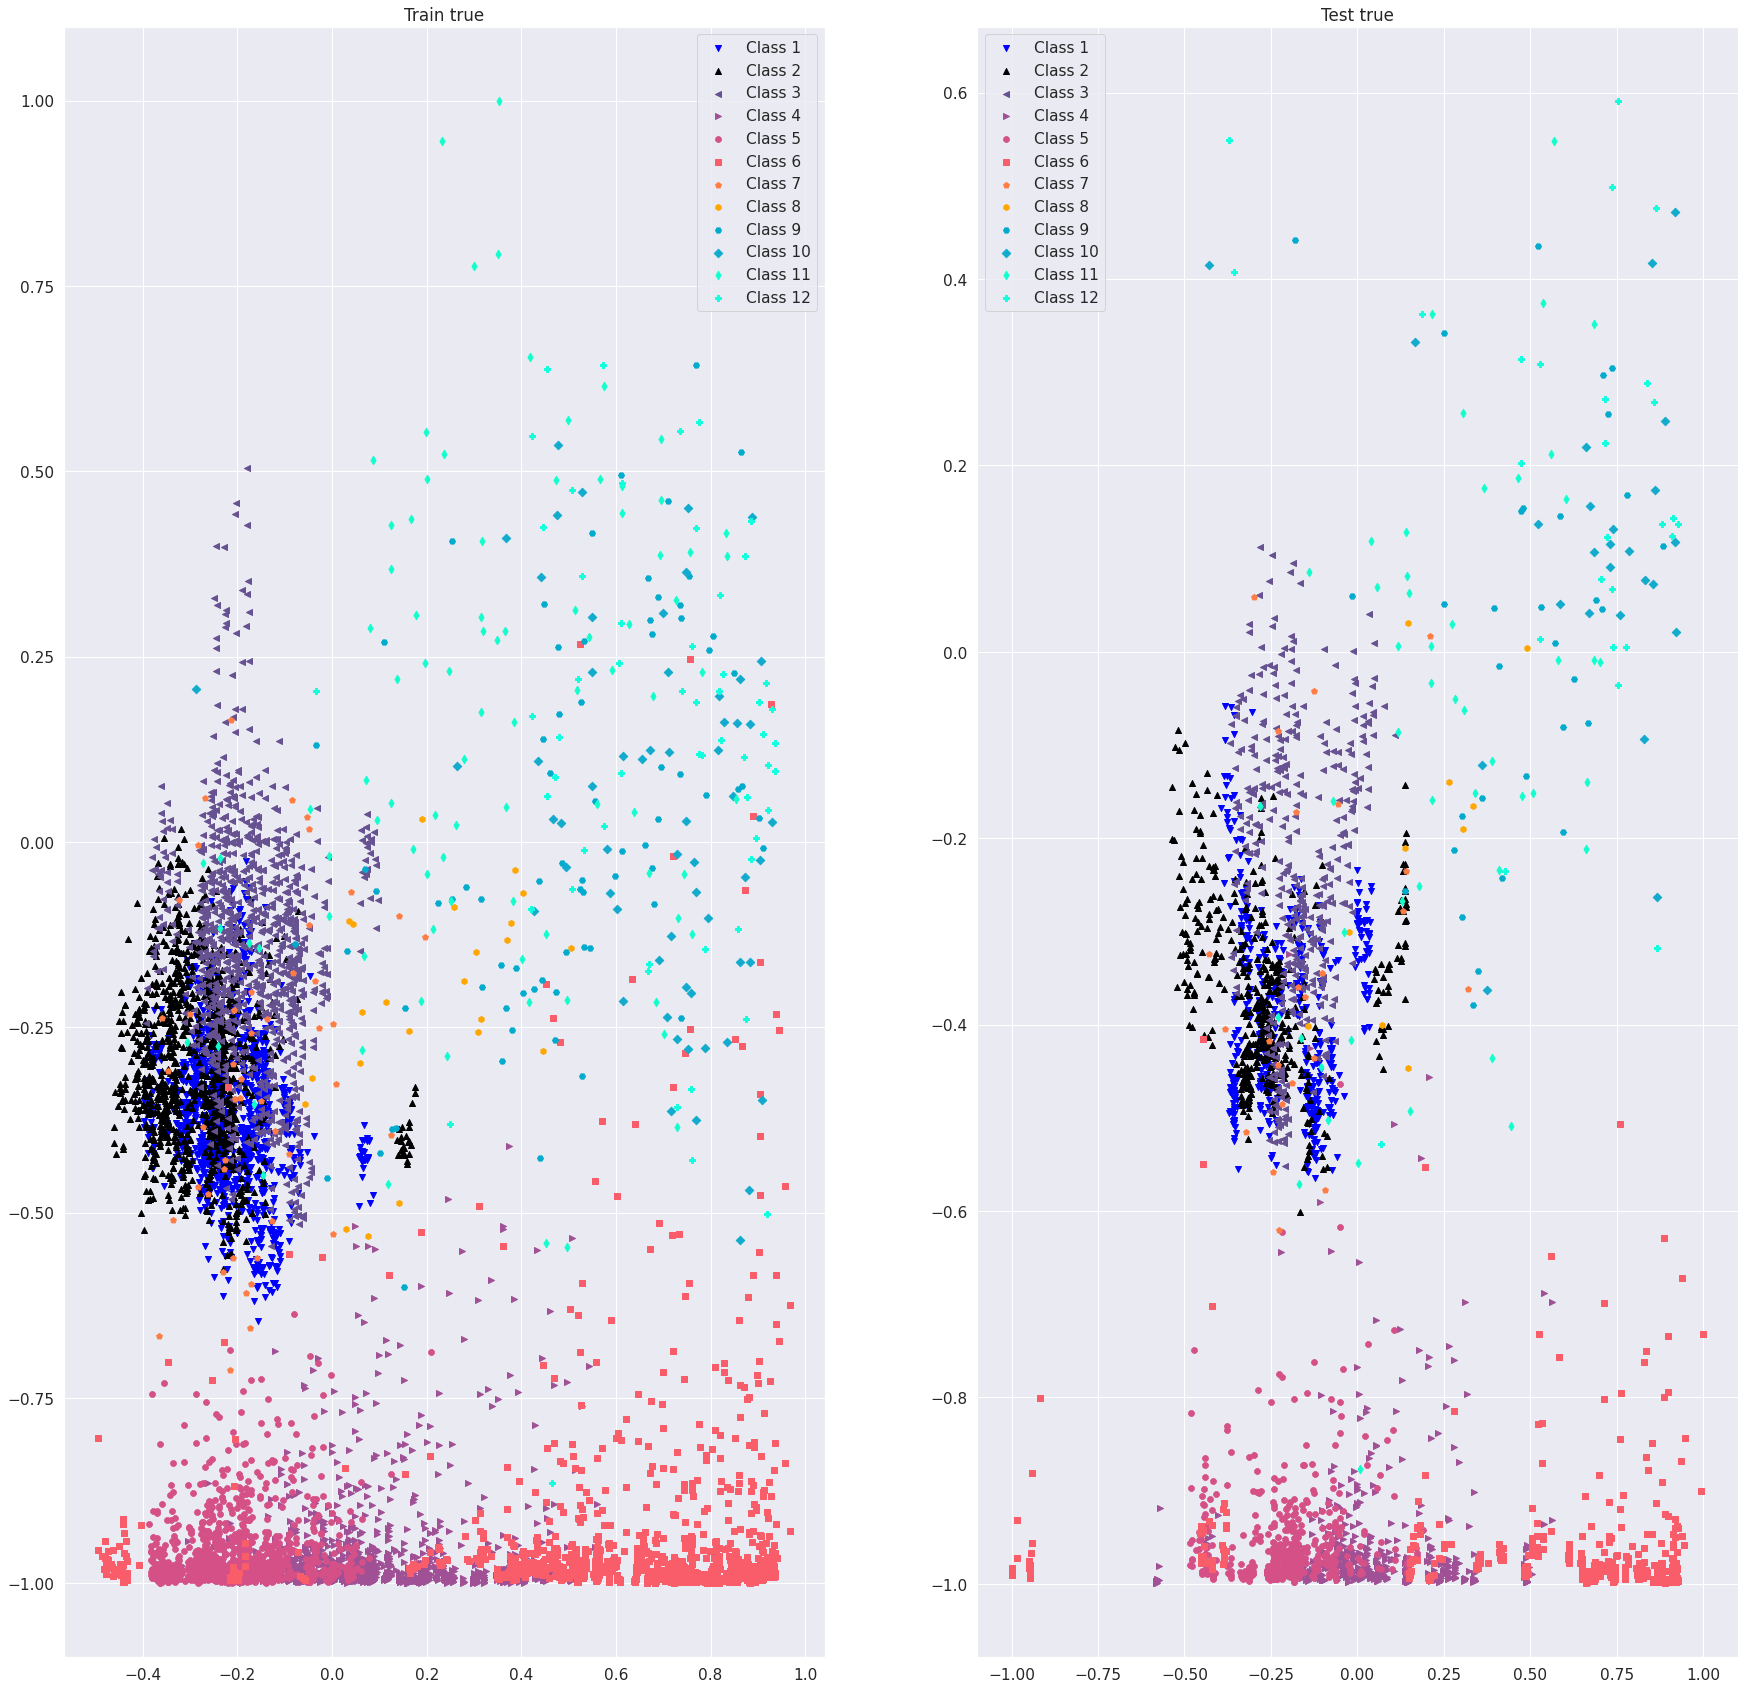

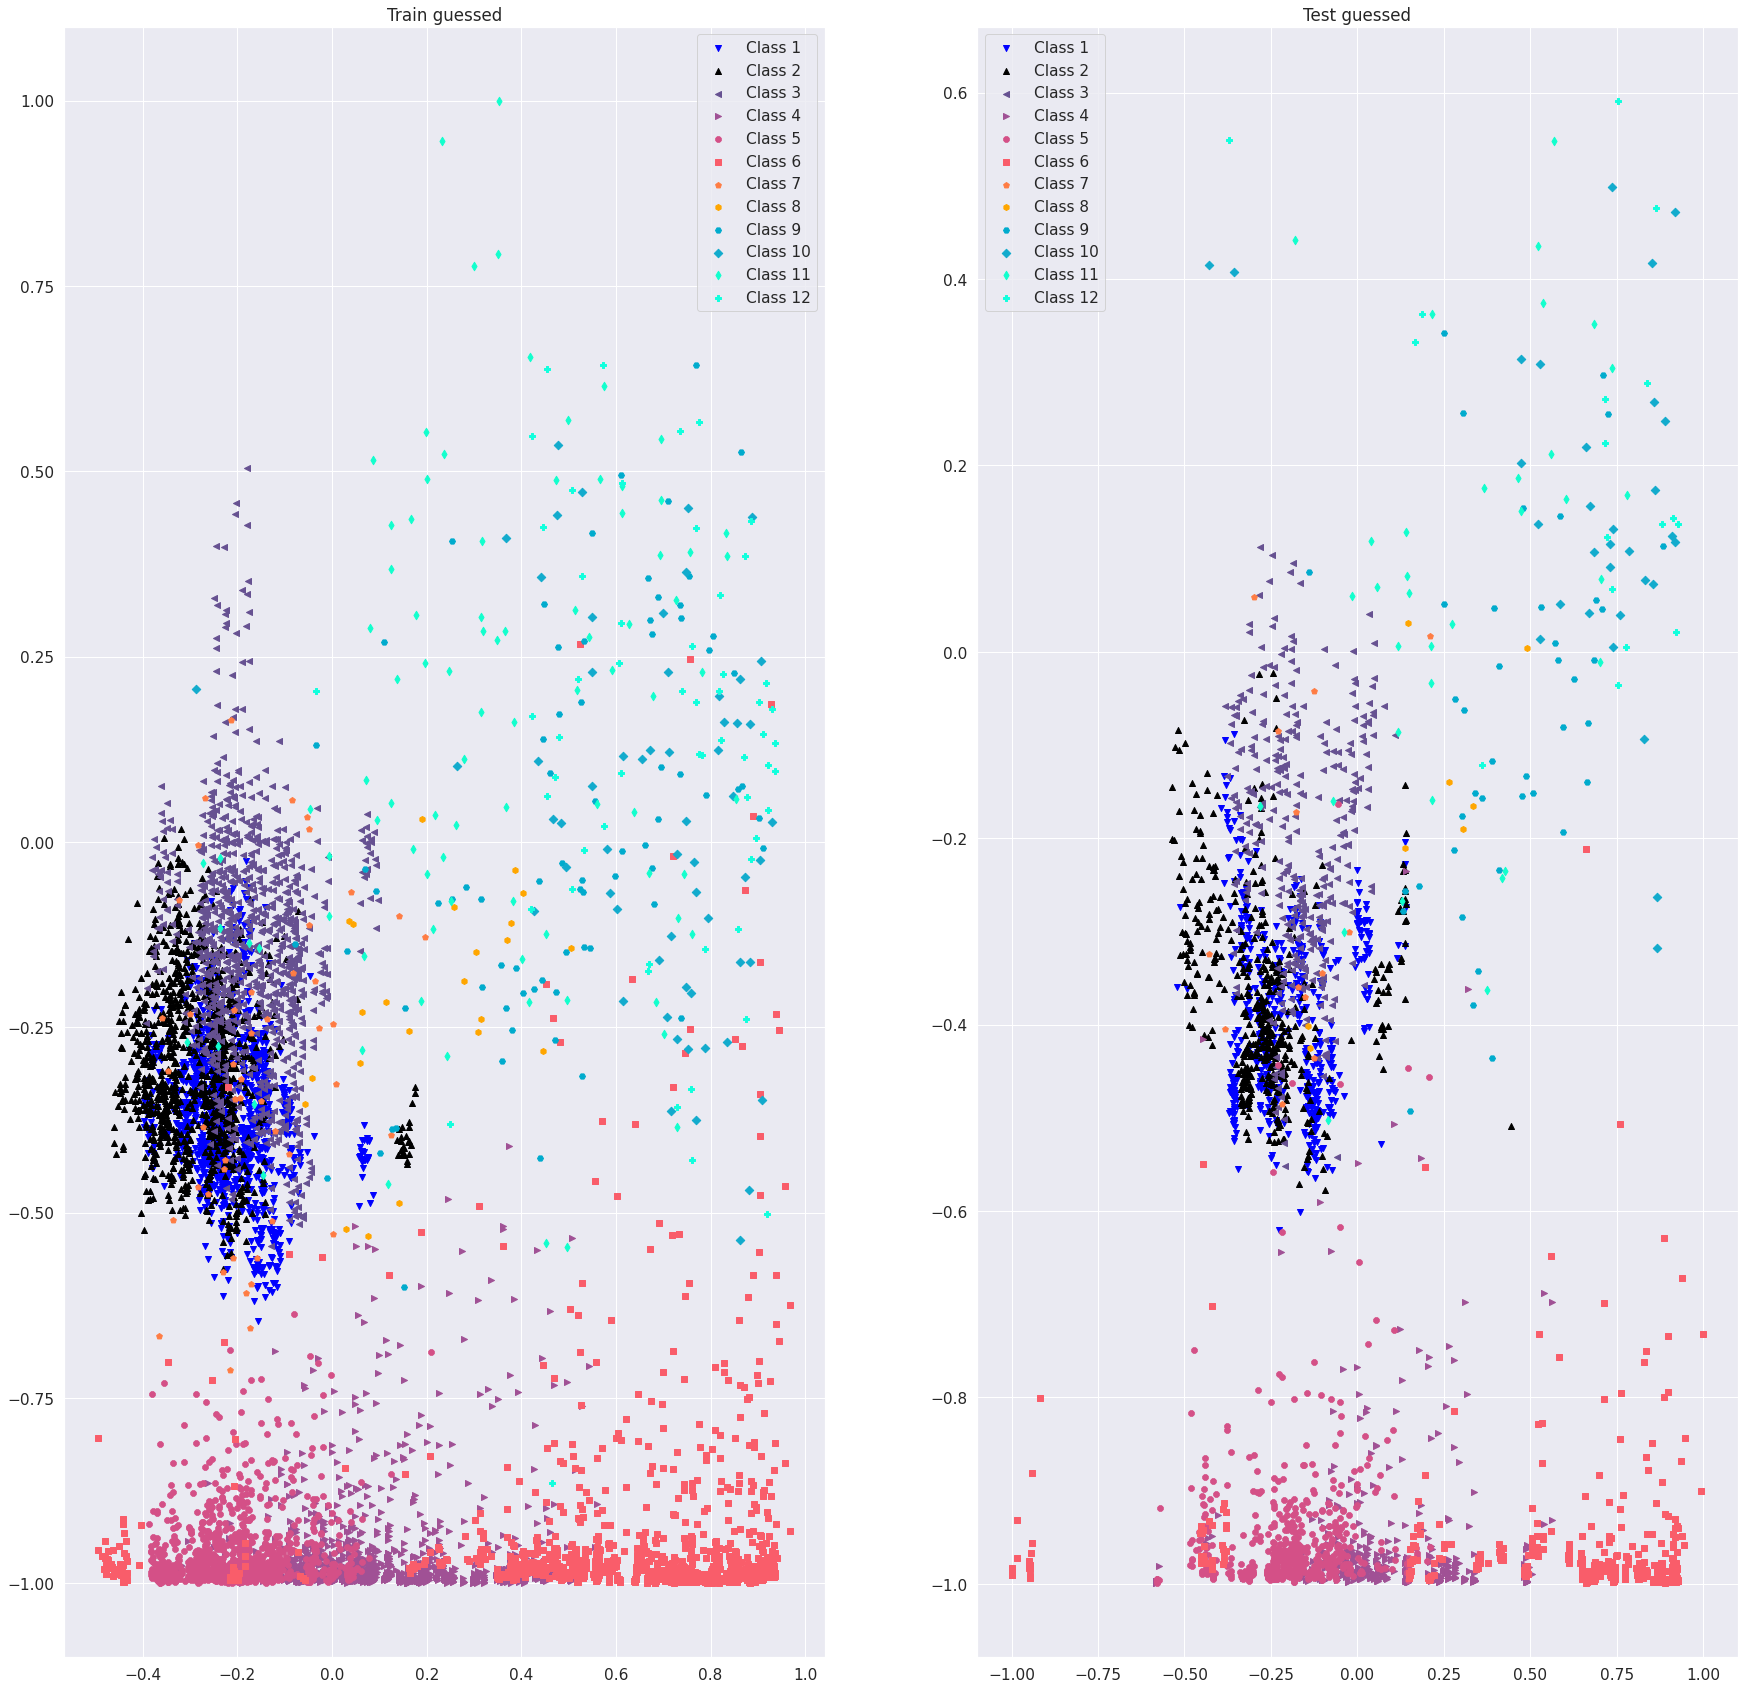

In [84]:
plt.rcParams["figure.figsize"]=30,30

#true values
X_train['class'] = Y_train
X_test['class'] = Y_test

fig, (ax_train, ax_test) = plt.subplots(1, 2)
col_a, col_b = 50, 200

print_result_by_col(ax_train, col_a, col_b, X_train)
print_result_by_col(ax_test, col_a, col_b, X_test)

ax_train.set_title('Train true')
ax_test.set_title('Test true')

#predicted values
X_train['class'] = ensemble_predictions_train
X_test['class'] = ensemble_predictions

fig, (ax_train, ax_test) = plt.subplots(1, 2)
print_result_by_col(ax_train, col_a, col_b, X_train)
print_result_by_col(ax_test, col_a, col_b, X_test)

ax_train.set_title('Train guessed')
ax_test.set_title('Test guessed')


plt.show()